In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("/Users/vishaal/Downloads/CC GENERAL.csv")
data.head()
data.shape

(8950, 18)

In [7]:
data=data.drop("CUST_ID",axis=1)
# Fill NaN in 'MINIMUM_PAYMENTS' with the mode of 'MINIMUM_PAYMENTS'
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mode()[0])
data=data.dropna()
data.isnull().sum()
#what labels do we wish to predict from this kind of tabel
#the dataset is about credit cards
#should we keep CREDIT_LIMIT  as the parameter for cluster


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
data.info()
data
data = np.array(data)

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

In [9]:
dat=np.array(data)
len(dat)

8949

In [10]:
#clustering free hand


In [36]:
import numpy as np

class KMeansClustering:
    

    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    def euclidean_distance(self, data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_iter=1000, tol=1e-4):
        #if not isinstance(X, np.ndarray):
        #    raise ValueError("Data must be a NumPy array.")

        self.centroids = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=(self.k, X.shape[1]))

        for _ in range(max_iter):
            y = []  # Labels for each data point
            for data_point in X:
                distances = self.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            cluster_centers = []
            for j in range(self.k):
                cluster_data = X[y == j]
                if len(cluster_data) == 0:  # Handling empty clusters
                    cluster_centers.append(self.centroids[j])
                else:
                    cluster_centers.append(np.mean(cluster_data, axis=0))

            cluster_centers = np.array(cluster_centers)
            centroid_movement = np.max(np.abs(self.centroids - cluster_centers))
            if centroid_movement < tol:
                break
            self.centroids = cluster_centers

        return y
kmean = KMeansClustering(3)
labels = kmean.fit(data)
print(labels[10])


2


In [24]:
def  euclidean_distance(data_point,centroid):
    return np.sqrt(np.sum((centroid-data_point)**2,axis=1))
k=3
low=float('inf')
centroids=np.random.uniform(np.amin(data,axis=0),np.max(data,axis=0),size=(k,data.shape[1]))
#print((centroids)) this code is correct
ni=0
for i in range(1):
    y=[]#the points at which the centroids are
    for data_point in dat:
        #print(data_point) this is also correct
        dist=[]
        #print(euclidean_distance(data_point,centroids))this is also correct
        dist=(euclidean_distance(data_point,centroids))
        #print(ni)
        ni+=1
        for i in range(k):
            
            #print(dist[i])
            if dist[i]==min(dist):
                y.append(i)
    print(len(y))# till here its correct

    for i in range(len(dat)):
        print(dat[0])
        n=0
        no=0
        for j in range(k):
            if y[i]==j:
                n+=dat[i]
                no+=1
        new_cent.append(n)
print(new_cent)
print(y.shape())
        


8949
[4.09007490e+01 8.18182000e-01 9.54000000e+01 0.00000000e+00
 9.54000000e+01 0.00000000e+00 1.66667000e-01 0.00000000e+00
 8.33330000e-02 0.00000000e+00 0.00000000e+00 2.00000000e+00
 1.00000000e+03 2.01802084e+02 1.39509787e+02 0.00000000e+00
 1.20000000e+01]


NameError: name 'new_cent' is not defined

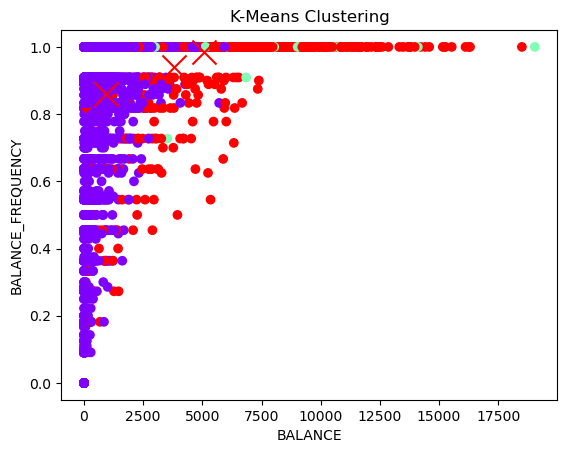

In [20]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title("K-Means Clustering")
    plt.xlabel("BALANCE")
    plt.ylabel("BALANCE_FREQUENCY")
    plt.show()

# Assuming data, labels, and centroids are defined
plot_clusters(data, labels, kmean.centroids)


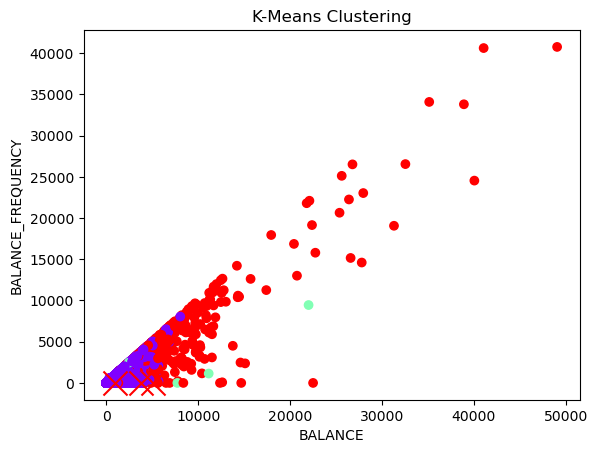

In [21]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 2], data[:, 3], c=labels, cmap='rainbow', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title("K-Means Clustering")
    plt.xlabel("BALANCE")
    plt.ylabel("BALANCE_FREQUENCY")
    plt.show()

# Assuming data, labels, and centroids are defined
plot_clusters(data, labels, kmean.centroids)

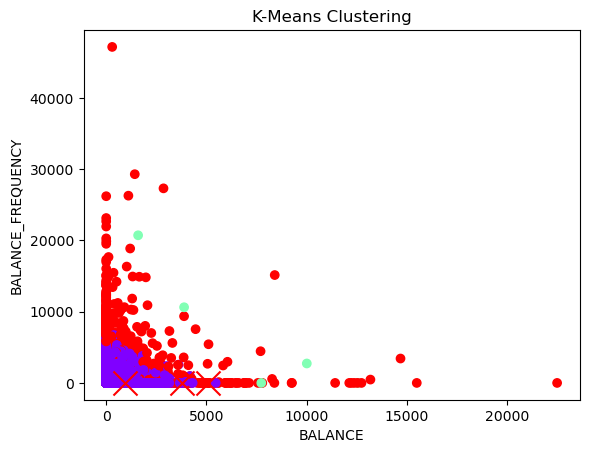

In [22]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 4], data[:, 5], c=labels, cmap='rainbow', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title("K-Means Clustering")
    plt.xlabel("BALANCE")
    plt.ylabel("BALANCE_FREQUENCY")
    plt.show()

# Assuming data, labels, and centroids are defined
plot_clusters(data, labels, kmean.centroids)

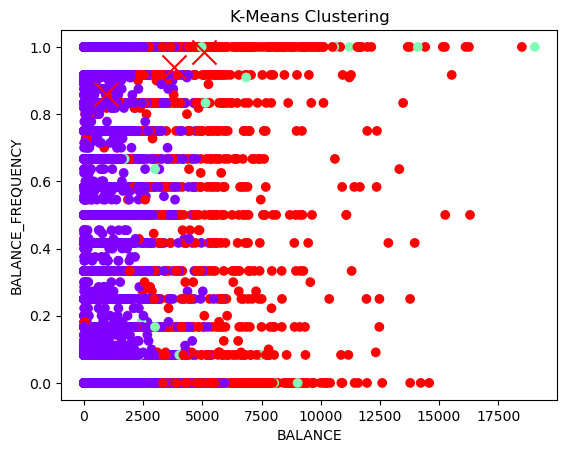

In [24]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 0], data[:, 6], c=labels, cmap='rainbow', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title("K-Means Clustering")
    plt.xlabel("BALANCE")
    plt.ylabel("BALANCE_FREQUENCY")
    plt.show()

# Assuming data, labels, and centroids are defined
plot_clusters(data, labels, kmean.centroids)

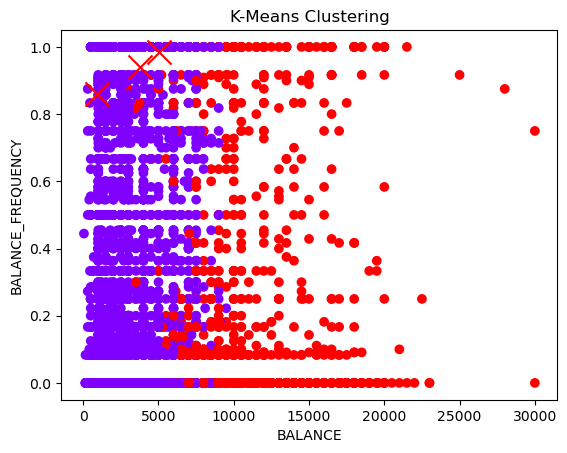

In [31]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 12], data[:, 15], c=labels, cmap='rainbow', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title("K-Means Clustering")
    plt.xlabel("BALANCE")
    plt.ylabel("BALANCE_FREQUENCY")
    plt.show()

# Assuming data, labels, and centroids are defined
plot_clusters(data, labels, kmean.centroids)

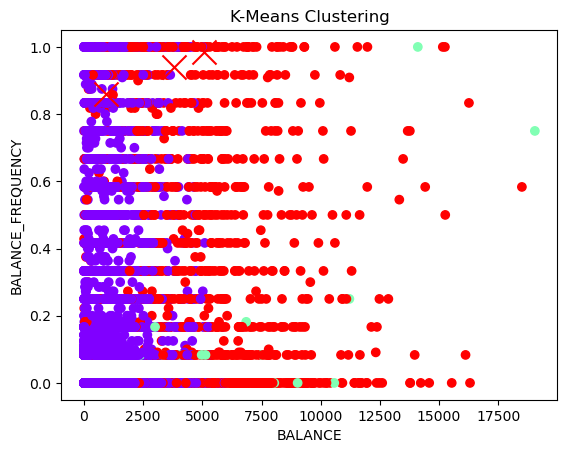

In [33]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 0], data[:, 7], c=labels, cmap='rainbow', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title("K-Means Clustering")
    plt.xlabel("BALANCE")
    plt.ylabel("BALANCE_FREQUENCY")
    plt.show()

# Assuming data, labels, and centroids are defined
plot_clusters(data, labels, kmean.centroids)